<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS__Quest_Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

# Exécutez le code ci-dessous
Vous obtiendrez la liste des passagers du Titanic.

In [2]:
import pandas as pd
import numpy as np


In [26]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

Quels sont les "types" de chaque colonne ? Existe-t-il des colonnes non numériques ?

In [4]:
# Quels sont les "types" de chaque colonne ? 
df_titanic.dtypes

# 3 en Objects, 3 Entiers et 2 Numériques.

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Name, Sex,Survived arenon-numeric columns

Nom, Sexe, Survécu sont des colonnes non numériques.

In [27]:
# On peut transformer par exmple la variable "sex" en valeurs numériques(binaire 0-1) par la méthode de factorisation:
df_titanic_fact_sex  = df_titanic['Sex'].factorize()[0]
df_titanic_fact_sex

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

Ensuite, faites une première exploration (diagrammes de paires, cartes thermiques de corrélation, etc...) de l'ensemble des données.

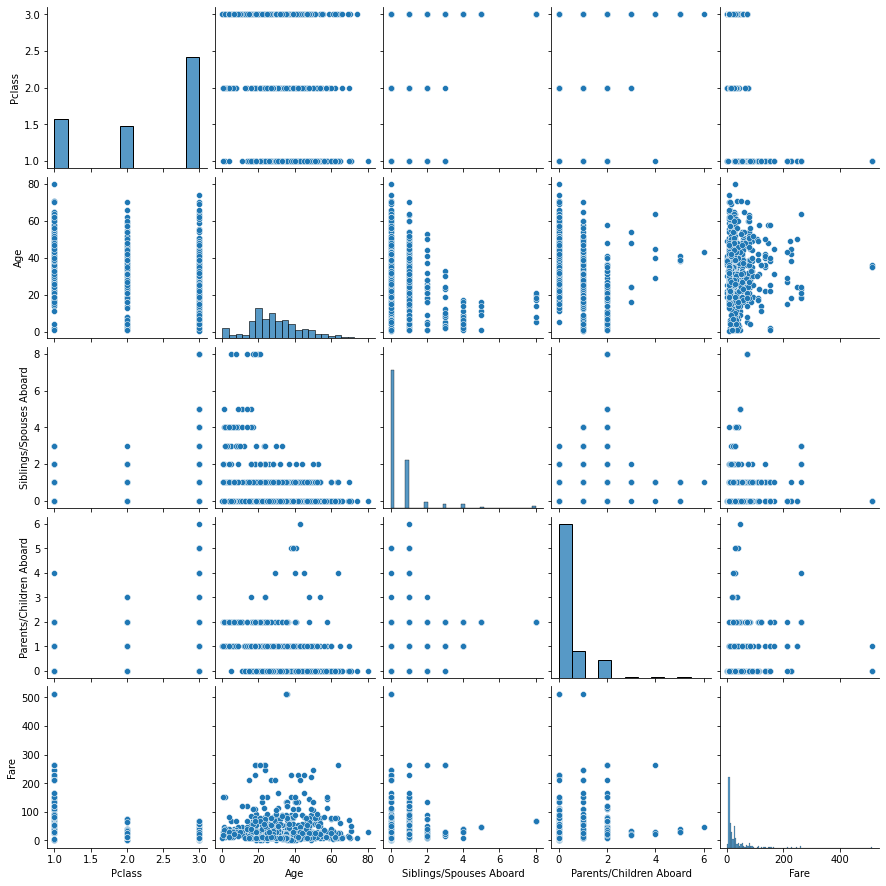

In [5]:
# 1ère exploration:

import seaborn as sns
sns.pairplot(df_titanic)

# Pour voir les Patterns(les relations entre les variables, 2 par 2!)

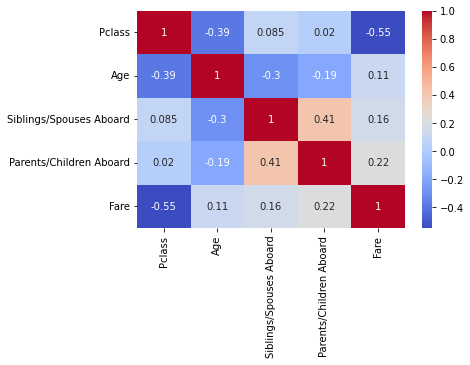

In [6]:
# 1ère exploration (suite):
import seaborn as sns
import matplotlib.pyplot as plt
# Carte de chaleur (~ Matrice de coorélation)
# Vous pouvez imaginer le "heatmap comme étant une forme de narration visuelle pour comprendre les données analytiques
corr = df_titanic.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

You are looking for Jack. How many people named Jack on board?

Vous cherchez Jack. Combien de personnes s'appellent Jack à bord ?

In [8]:
# How many people named Jack on board?
# Combien de personnes s'appellent Jack à bord ?
jack_count = df_titanic[df_titanic['Name'].str.contains("Jack")].shape[0]
print("Le nombre de personne(s) nommée(s) Jack à bord est :", jack_count)

Le nombre de personne(s) nommée(s) Jack à bord est : 1


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

# Régression logistique

Aujourd'hui, dans cette quête, vous avez un pouvoir extraordinaire : vous pouvez voyager dans le temps pour tenter de sauver certains passagers. 
Vous vouliez évidemment sauver Jack. Mais vous n'avez pas trouvé son nom sur la liste. Il voyage probablement sous un faux nom...
Tant pis, grâce à ce voyage, vous allez quand même essayer de sauver un maximum de personnes. Pour ce faire, vous devez identifier les personnes qui vont très probablement mourir. 

- Sélectionnez les caractéristiques (X) avec uniquement des valeurs numériques, et sans la colonne "Survivants".
- Sélectionnez la colonne "Survivant" comme cible (y).
- Divisez vos données avec **random_state = 36**.
- Entraînez une régression logistique
- Imprimez le score de précision sur l'ensemble d'entraînement et sur l'ensemble de test. Y a-t-il un surajustement ?
- Imprimez la matrice de confusion sur l'ensemble de test.
- Combien d'itérations ont été nécessaires pour entraîner ce modèle ?

In [9]:
# It's up to you:
#Sélectionner les caractéristiques (X) avec seulement des valeurs numériques, et sans la colonne "Survécu".
X=df_titanic[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
X

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
882,2,27.0,0,0,13.0000
883,1,19.0,0,0,30.0000
884,3,7.0,1,2,23.4500
885,1,26.0,0,0,30.0000


In [10]:
#Sélectionner la colonne "Survivants" comme cible (y)
y=df_titanic[['Survived']]
y

,Survived
0,Dead
1,Survived
2,Survived
3,Survived
4,Dead
...,...
882,Dead
883,Survived
884,Dead
885,Survived


In [11]:
#Séparer vos données avec random_state = 36
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=36)
print("La longueur du jeu de données initial est de :", len(X))
print("La longueur de l'ensemble de données 'train' est la suivante  :", len(X_train))
print("La longueur de l'ensemble de données de test est    :", len(X_test))

La longueur du jeu de données initial est de : 887
La longueur de l'ensemble de données 'train' est la suivante  : 665
La longueur de l'ensemble de données de test est    : 222


In [12]:
#"Train" d'une régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression().fit(X_train,y_train)

In [13]:
#Imprimez le score de précision sur l'ensemble d'entraînement et sur l'ensemble de test. Y a-t-il un surajustement ?
model.score(X_train, y_train)


0.718796992481203

In [14]:
# oui, il y a sur-ajustement car ces deux scores sont trop différents
model.score(X_test, y_test)

0.6441441441441441

In [15]:
# Imprimez la matrice de confusion sur le jeu de test.
from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,109,20
Survived ACTUAL,59,34


In [16]:
# propriété "n_iter"/ "n_iterint", par défaut=10
# Nombre de paramètres qui sont échantillonnés et vues pendant le test.
# n_iter est un compromis entre le temps d'exécution et la qualité de la solution.
n_iter = model.n_iter_
print(n_iter)

[55]


In [20]:
# Autrement
print("nombre d'itérations nécessaires pour ajuster le modèle:",model.n_iter_)

nombre d'itérations nécessaires pour ajuster le modèle: [75]


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

# Amélioration du modèle

Avec votre machine à remonter le temps, vous pouvez, et vous sauverez toutes les personnes que le modèle prédit comme mortes. Mais vous ne sauverez pas les personnes prédites comme "survivantes" (parce que ce n'est pas nécessaire). Changez donc les poids des classes pour faire très attention : votre objectif est de sauver toutes les personnes à risque. Donc, dans ce cas, il est préférable d'avoir les personnes "ayant survécu" prédites comme mortes, car vous les sauverez de toute façon. Sinon, les "morts réels" prédits comme survivants ne seront pas sauvés par votre machine à remonter le temps.
- Modifier le poids des classes
- Ajustez le modèle sur le jeu d'entraînement
- Imprimez le score de précision sur l'ensemble d'entraînement et sur l'ensemble de test.
- Imprimez la matrice de confusion sur l'ensemble de test, vous ne devez avoir aucun décès qui a été prédit comme "Survécu".

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Changer le poids des classes pour être plus prudent dans la prédiction des décès.
class_weights = {'Survived': 1, 'Dead': 10}

# Entraîner "Train" un modèle de régression logistique
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Évaluer le modèle sur les ensembles de formation et de test.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("coeff Train accuracy:", train_accuracy)
print("Coeff Test accuracy:", test_accuracy)

# Imprimez la matrice de confusion sur l'ensemble de test.
#cm = confusion_matrix(y_test, y_test_pred)
cm=pd.DataFrame(data = confusion_matrix(y_test, y_test_pred),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")
print("Confusion Matrix:")
print(cm)

coeff Train accuracy: 0.6300751879699248
Coeff Test accuracy: 0.5900900900900901
Confusion Matrix:
                 Dead PREDICTED  Survived PREDICTED
Dead ACTUAL                 129                   0
Survived ACTUAL              91                   2


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

# Les personnes les plus exposées

Vous recherchez les personnes les plus à risque.
- Calculez les probabilités de prédiction **sur votre ensemble de test**.
- Quelle colonne correspond à la probabilité "Survivant" ?
- Parmi le tableau de probabilité de prédiction précédent, sélectionnez uniquement la colonne correspondant à la probabilité "Survived" (Survécu)
- Affichez les passagers en triant les plus susceptibles de survivre en premier (méthode `sorted_values()`)

In [18]:
# It's up to you:
#Calculer les probabilités de prédiction sur votre ensemble de test :
sp=model.predict_proba(X_test.iloc[: , :])
sp

array([[0.90912458, 0.09087542],
       [0.98167958, 0.01832042],
       [0.96599843, 0.03400157],
       [0.90451778, 0.09548222],
       [0.98384237, 0.01615763],
       [0.96075281, 0.03924719],
       [0.97105645, 0.02894355],
       [0.97723136, 0.02276864],
       [0.69734041, 0.30265959],
       [0.96630714, 0.03369286],
       [0.96779095, 0.03220905],
       [0.88280347, 0.11719653],
       [0.87878612, 0.12121388],
       [0.96161705, 0.03838295],
       [0.96450563, 0.03549437],
       [0.9471366 , 0.0528634 ],
       [0.95647007, 0.04352993],
       [0.79907654, 0.20092346],
       [0.97633588, 0.02366412],
       [0.95849635, 0.04150365],
       [0.97499548, 0.02500452],
       [0.90008599, 0.09991401],
       [0.95348407, 0.04651593],
       [0.84305301, 0.15694699],
       [0.93139704, 0.06860296],
       [0.97494196, 0.02505804],
       [0.86086292, 0.13913708],
       [0.97470007, 0.02529993],
       [0.98722383, 0.01277617],
       [0.90576106, 0.09423894],
       [0.

In [21]:
# Quelle colonne correspond à la probabilité "Survivant" ?
model.classes_

array(['Dead', 'Survived'], dtype=object)

In [28]:
# Autrement
print("Ordre/Class du modèle :",model.classes_)

Ordre/Class du modèle : ['Dead' 'Survived']


right column

In [29]:
#Parmi le tableau de probabilité de prédiction précédent, sélectionnez uniquement la colonne correspondant à la probabilité "Survivant".
sps=sp[:, 1]
sps
#Remarques: les proba(s) n'exèdent pas 0.4 !

array([0.09087542, 0.01832042, 0.03400157, 0.09548222, 0.01615763,
       0.03924719, 0.02894355, 0.02276864, 0.30265959, 0.03369286,
       0.03220905, 0.11719653, 0.12121388, 0.03838295, 0.03549437,
       0.0528634 , 0.04352993, 0.20092346, 0.02366412, 0.04150365,
       0.02500452, 0.09991401, 0.04651593, 0.15694699, 0.06860296,
       0.02505804, 0.13913708, 0.02529993, 0.01277617, 0.09423894,
       0.05343022, 0.08649806, 0.12845493, 0.01735411, 0.69170713,
       0.02028751, 0.01802002, 0.12678779, 0.03369286, 0.05724205,
       0.04213124, 0.03693394, 0.02365382, 0.2832081 , 0.01212918,
       0.09190515, 0.03044045, 0.04216008, 0.01292841, 0.01035948,
       0.12807634, 0.04123479, 0.02364576, 0.02149928, 0.04561461,
       0.03551622, 0.01093908, 0.09600817, 0.02247604, 0.06207568,
       0.02892731, 0.01416085, 0.02892731, 0.03735122, 0.02618536,
       0.03548654, 0.22170263, 0.43112182, 0.04350424, 0.03560818,
       0.05197852, 0.07279268, 0.02248584, 0.48972846, 0.02713

In [30]:
# Afficher les passagers en triant les plus susceptibles de survivre en premier (méthode sorted_values() ?)
# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({"PassengerId": X_test.index, "Survived Probability": sps})

# Trier le DataFrame par la colonne "Probabilité de survie" en ordre décroissant.
results.sort_values("Survived Probability", ascending=False, inplace=True)

# Afficher les passagers les plus susceptibles de survivre en premier
print(results)

     PassengerId  Survived Probability
34           303              0.691707
123          547              0.531570
73           309              0.489728
203          375              0.473628
67           733              0.431122
..           ...                   ...
179          322              0.009368
198          628              0.007593
134          480              0.004099
126          508              0.003490
197          535              0.003041

[222 rows x 2 columns]


In [32]:
# Autrement 

model.predict_proba(X_test.iloc[:5,:])

array([[0.90912458, 0.09087542],
       [0.98167958, 0.01832042],
       [0.96599843, 0.03400157],
       [0.90451778, 0.09548222],
       [0.98384237, 0.01615763]])

In [33]:
# Autrement suite

df_proba = X_test.copy()
df_proba['Survived probability'] = model.predict_proba(X_test)[:,1]
df_proba_sort = df_proba.sort_values(by='Survived probability',ascending=False)

df_result = pd.concat([df_titanic.iloc[df_proba_sort.index,:],
                       df_proba_sort['Survived probability']],
                      axis=1)
df_result

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived probability
303,Survived,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500,0.691707
547,Survived,1,Mr. John Borland Jr Thayer,male,17.00,0,2,110.8833,0.531570
309,Survived,1,Miss. Emily Borie Ryerson,female,18.00,2,2,262.3750,0.489728
375,Dead,1,Mr. Harry Elkins Widener,male,27.00,0,2,211.5000,0.473628
733,Survived,1,Mr. Gustave J Lesurer,male,35.00,0,0,512.3292,0.431122
...,...,...,...,...,...,...,...,...,...
322,Dead,3,Mr. George John Jr Sage,male,20.00,8,2,69.5500,0.009368
628,Dead,3,Mr. Johan Svensson Lundahl,male,51.00,0,0,7.0542,0.007593
480,Survived,3,Mrs. (Hedwig) Turkula,female,63.00,0,0,9.5875,0.004099
508,Dead,3,Mr. James Webber,male,66.00,0,0,8.0500,0.003490


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

# Bonus - Amélioration du modèle, sous contrainte

Votre patron de voyage dans le temps vous annonce qu'il y a une réduction de budget. Vous ne pouvez désormais sauver que 120 personnes maximum. Pas une de plus.

Si votre modèle prédit comme "mort" une personne qui aurait survécu dans la réalité. Vous "sauvez" alors cette personne, qui aurait survécu même sans votre aide pour voyager dans le temps. Et vous prenez la place de quelqu'un qui aurait pu être sauvé. Ce n'est pas optimal.

Sélectionnez les 120 personnes ayant la plus forte probabilité de mourir. Parmi elles, combien ont réellement survécu ?

In [35]:
# It's up to you:

# Sélectionnez les 120 personnes ayant la plus forte probabilité de mourir.
most_at_risk = results.head(120)
most_at_risk

,PassengerId,Survived Probability
34,303,0.691707
123,547,0.531570
73,309,0.489728
203,375,0.473628
67,733,0.431122
...,...,...
85,595,0.041204
107,651,0.041150
159,619,0.039460
116,563,0.039260


In [34]:
# Autrement et plus généralement
# Comptez le nombre de personnes qui ont survécu :
(df_result.iloc[-120:,:]['Survived']=='Survived').sum()

39

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?

# Bonus - Plus de prédictions

Le Révérend "Rev. Juozas Montvila" a-t-il une meilleure chance de survie que "Mme William (Margaret Norton) Rice" ?
- Filtrez le DataFrame initial pour obtenir seulement les 2 lignes avec les 2 personnes ci-dessus, et seulement les colonnes présentes dans vos variables (X)
- Faites une prédiction avec probabilité pour ces 2 personnes
- Laquelle a le plus de chance de survivre ?

In [36]:
# It's up to you:

# Comptez le nombre de personnes qui ont survécu avec des critères spécifiques "contains".
# actual_survivors = sum(y_test[most_at_risk.index] == "Survived")
df_two_people = df_titanic[df_titanic['Name'].isin(["Rev. Juozas Montvila","Mrs. William (Margaret Norton) Rice"])]
df_two_people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000


In [37]:
model.predict_proba(df_two_people.select_dtypes(include=np.number))

array([[0.93243605, 0.06756395],
       [0.92067171, 0.07932829]])